<a href="https://colab.research.google.com/github/imlilalex/Module5SharkAssignment/blob/main/Module_5_Shark_attack_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext google.colab.data_table

In [2]:
file = ('attacks.csv')

df = pd.read_csv(file, encoding='cp1252')
df2 = df.drop(columns=["Case Number", "pdf", "href formula", "href", "Case Number.1", "Case Number.2", "original order", "Investigator or Source", "Unnamed: 22", "Unnamed: 23"])
df2.columns = ['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species']
df2.dropna(how="all", inplace = True)
df2

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27074,Before 1903,0000,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
27075,Before 1903,0000,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
27076,1900-1905,0000,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
27077,1883-1889,0000,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


In [15]:
def look_at_unique_values(column): 
  unique_values_cutoff = 200
  unique_values = column.unique()
  num_unique_values = len(unique_values)
  if num_unique_values == len(column):
    print(f"Each value in the column is unique (total: {num_unique_values})")
  elif num_unique_values < unique_values_cutoff:
    print(f"Less than {unique_values_cutoff} unique values:")
    # We may get an error when sorting
    try:
      sorted = np.sort(unique_values)
      print("Values are sorted")
      display(list(sorted))
    except:
      print("Could not sort values")
      display(list(unique_values))
  else:
    print(f"More than {unique_values_cutoff} unique values (total: {num_unique_values})")

look_at_unique_values(df2.Injury)
 # Type missing values = Invalid, nan

More than 200 unique values (total: 3738)


41

# Questions to answer:

1.   What are the most dangerous types of sharks to humans?
2.   Are children more likely to be attacked by sharks?
3.   Are shark attacks where sharks were provoked more or less dangerous?
4.   Are certain activities more likely to result in a shark attack?









# Most Dangerous Species

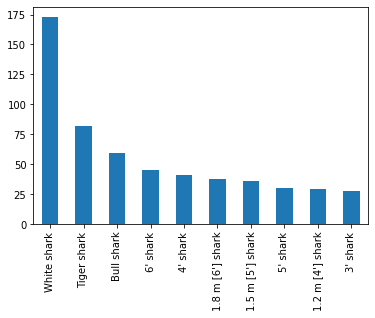

In [5]:
df3 = df2.dropna(subset = ['Species'])
# df3.Species.str.contains("involvement").value_counts()

df3 = df3[df3['Species'].str.contains('involvement|Invalid|Questionable|not') == False]

df3['Species'].value_counts()[:10].plot(kind='bar')


According to this data, the most dangerous species is the White shark. However, it is important to note that a lot of the data did not list a specific species or was labelled differently making it difficult to produce an accurate data set for this question. 

I made the assumption here that entries containing involvement were the more common entry of "no shark involvement" (or a variation) so removed them. I also assumed that any entries where the involvement of a shark was "questionable" were instead false data points for this specific set. These may have introduced a bias by not including legitimate entries for some species of shark. 

# Are children more likely to be attacked by sharks?

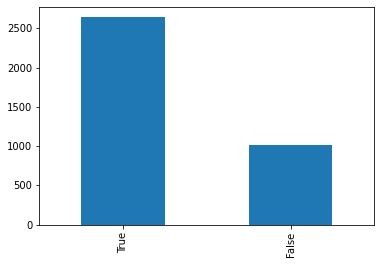

In [6]:
from IPython.core.formatters import catch_format_error
df4 = df2.dropna(subset = ['Age'])
# df4['Age'].unique()

df4 = df4[df4['Age'].str.contains('\&|or|\?|to') == False]
df4['Age'].replace({"teen": "15", "Teens":"15", "Teen": "15"}, inplace = True)
df4.loc[df4['Age'].str.contains('month'), 'Age'] = '1'
df4.loc[df4['Age'].str.contains('mid'), 'Age'] = '30'
df4.loc[df4['Age'].str.contains('young'), 'Age'] = '15'
df4.loc[df4['Age'].str.contains('adult'), 'Age'] = '30'
df4['Age'] = df4['Age'].str.replace(r's', '')
df4['Age'] = df4['Age'].str.replace(r'½', '')
df4['Age'] = df4['Age'].str.replace(r' ', '')
df4['Age'].replace("", np.nan, inplace = True)

df4 = df4.dropna(subset = ['Age'])
df4 =df4[df4.Age.apply(lambda x: x.isnumeric())]


df4['Age'] = df4['Age'].astype('int')

# df4['Age'].unique()
adult = df4['Age'] >= 18
adult.value_counts()

adult.value_counts().plot(kind='bar')

The data suggests that Adults are more likely to be attacked than children. This may be influenced by other factors though, such as Adults more frequently partaking in activities which provoke attacks, or because Adults are more likely to be in deeper water where Sharks are more commonly found. 

It should also be noted that due to the messy nature of this data, I did assume some ages. For example, entries referencing 'teen', 'teens' or 'young' were changed to be a children's age (in this case 15) as I felt it more likely they were children than adult. I did similar with entries referencing 'month' as they are most likely babies. This may have introduced some minor bias as there is little way to tell if there was a strange entry such as someone being referenced in months despite being adult, or more likely someone being noted as 'teen' even if they were 18 or 19 which would be considered adult rather than child. 

# Are shark attacks where sharks were provoked more or less dangerous?

In [126]:
# Data imputs = 'Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable', 'Sea Disaster', nan, 'Boat', 'Boatomg', "4 m [13'], 590-kg white shark"]

df2['Type'].replace("Invalid", None, inplace=True)
df2['Type'].replace("Boatomg", "Boating", inplace=True)
df2['Type'].replace("4 m [13'], 590-kg white shark", None, inplace=True)
# look_at_unique_values(df5.Type)
df5 = df2.dropna(subset = ['Type'])
df5= df5.dropna(subset = ['Injury'])
df5['Injury'] = df5['Injury'].astype('str')

df5.loc[df5['Injury'].str.contains('Minor|Bruise'), 'Injury'] = 'Minor'
df5.loc[df5['Injury'].str.contains('No injury'), 'Injury'] = 'None'
df5.loc[df5['Injury'].str.contains('FATAL|remain'), 'Injury'] = 'FATAL'
df5.loc[df5['Injury'].str.contains('Significant|severe|Severe'), 'Injury'] = 'Significant'
df5.loc[df5['Injury'].str.contains('Injur|injur'), 'Injury'] = 'Other Injury'
df5.loc[df5['Injury'].str.contains('Lacerat|lacerat|Bitten|bitten|puncture|Puncture|bite|Bite|Cut|cut'), 'Injury'] = 'Lacerations'
df5

df5['Injury'].value_counts()

Lacerations                                                      2788
FATAL                                                            1995
None                                                              843
Significant                                                       468
Other Injury                                                      336
                                                                 ... 
Abrasion to forearm                                                 1
Remains recovered from 4 m, 420-kg, caught 13-Dec-1987k             1
25 people survived; 300 shark-mutilated bodies were recovered       1
According to survivors, many people were taken by sharks            1
Abrasions to shins                                                  1
Name: Injury, Length: 558, dtype: int64

Text(0.5, 1.0, 'Injuries sustained from provoked attacks')

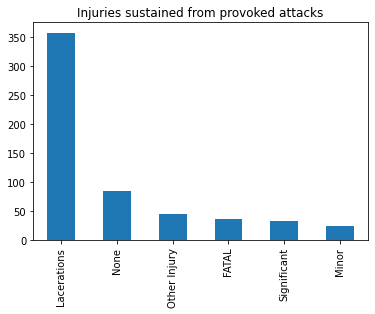

In [127]:
df6 = df5.loc[df5['Type']=='Provoked']

df6.Injury.size
# 737
df6['Injury'].value_counts()[:5]
#Counts = 264, 86, 24, 23, 20

df6['Injury'].value_counts()[:6].plot(kind='bar')
plt.title('Injuries sustained from provoked attacks')

Text(0.5, 1.0, 'Injuries sustained from unprovoked attacks')

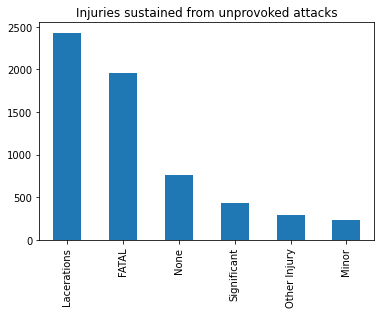

In [128]:
df7 = df5.loc[df5['Type']!='Provoked']

df7.Injury.size
# 6875
df7['Injury'].value_counts()[:5]
# Counts = 2235, 1634, 777, 308, 216

df7['Injury'].value_counts()[:6].plot(kind='bar')
plt.title('Injuries sustained from unprovoked attacks')

The data does not suggest that Provoked attacks are more dangerous than Unprovoked or Boating related attacks. There is actually a larger proportion of fatal attacks from those which were not classified as provoked suggesting unprovoked attacks are more dangerous.

However, the number of provoked attacks is significantly smaller than the number of other attack types which may mean the data doesn't fully represent the case. The significant variation in inputs also meant that a number of assumptions had to be made to help understand the data, and a significant number of inputs were not specifically classified because of this large variation. While it is unlikely this data will significantly alter the assumption we can take away here, it does introduce a potential bias to be aware of. 

Besides fatal and non-fatal injury it can also be difficult to class the dangerousness of the attack, making keywords like 'minor' or 'severe' the best differentiator. The data here is likely biased from the input though, due to the level of human perception and opinion required in this observation. For this reason, any injuries which did not include one these key words, but referenced a cut, bite or puncture I grouped as 'Lacerations' - assuming the level of danger from this injury to be similar if they did not specifically say otherwise.

# Are certain activities more likely to result in a shark attack?

More than 200 unique values (total: 1154)


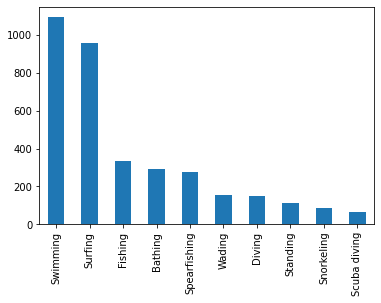

In [130]:
# look_at_unique_values(df2.Activity)
df8 = df2

df8['Activity'].replace(" ||.", None, inplace=True)

df8 = df2.dropna(subset = ['Activity'])

df8.loc[df8['Activity'].str.contains('surf|Surf'), 'Activity'] = 'Surfing'
df8.loc[df8['Activity'].str.contains('spearfish|Spearfish'), 'Activity'] = 'Spearfishing'
df8.loc[df8['Activity'].str.contains('swim|Swim'), 'Activity'] = 'Swimming'
df8.loc[df8['Activity'].str.contains('body board|Boogie|boogie'), 'Activity'] = 'Boogie boarding'

look_at_unique_values(df8.Activity)
# df8.Activity.size
# 6935
df8.Activity.value_counts()[:20]
df7['Activity'].value_counts()[:10].plot(kind='bar')

According to the data, Swimming and Surfing are more likely than any other activities to result in a shark attack. 

Similar to the other data, this set is messy, but there is also a lot of crossover. Those who are diving may also be classed as swimming for example, and snorkelling and scuba diving also largely overlap which may make Swimming even more likely to result in an attack than surfing. Due to the enormous nature of variation of specific activities though, I made a few assumptions about entries to try and group all the relevant information together for the more frequent activities (e.g. anything containing surf being grouped with surfing). It is likely some bias is introduced here in my effort to simplify the inputs to an understandable level, though hopefully not enough to impact the overall take-aways. 